In [1]:
import sys
import os
import math

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
    
from smfret_analysis import print_info, Plotter

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
print_info()

smFRET analysis software version 2.1
(git revision 2.1-56-g70f9081)
Output version 11
Using sdt-python version 14.0


# FRET efficiencies

In [4]:
p = Plotter()

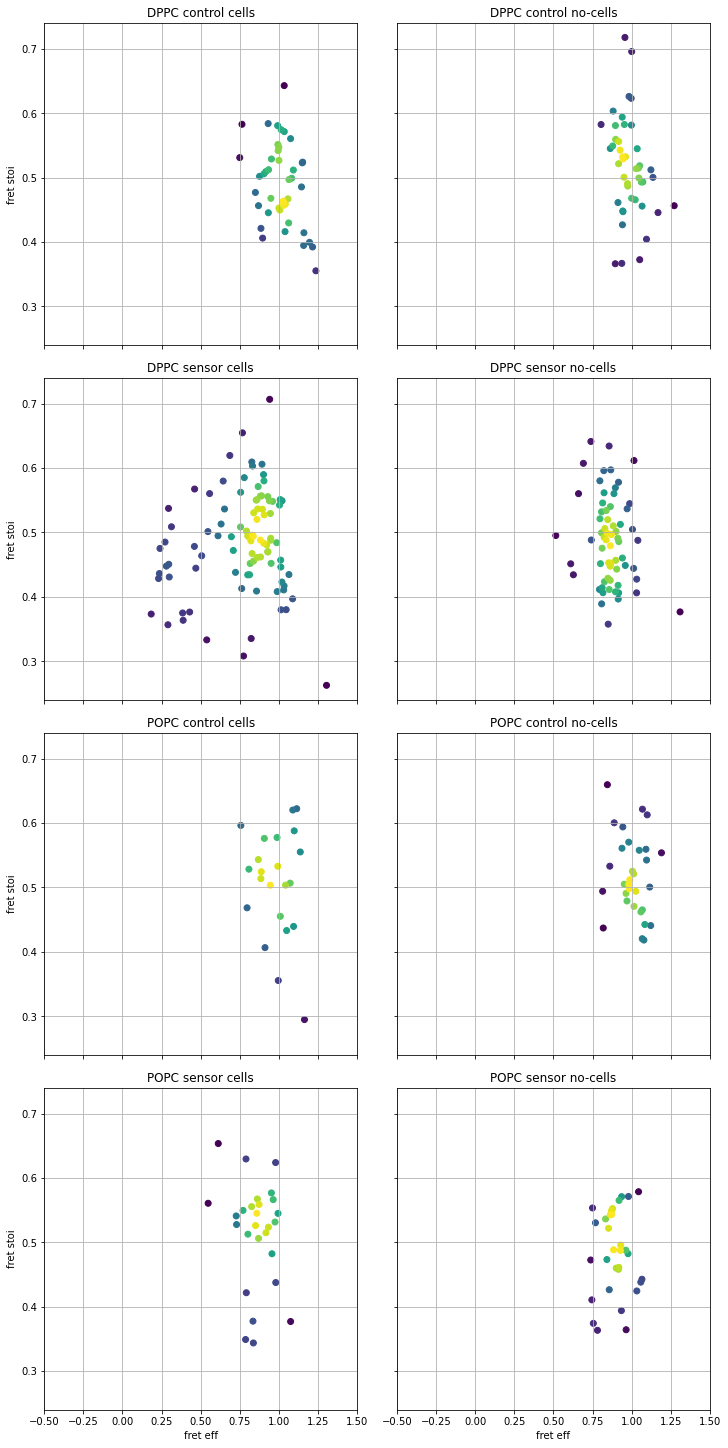

In [5]:
p.scatter(frame=2, xlim=(-0.5, 1.5));

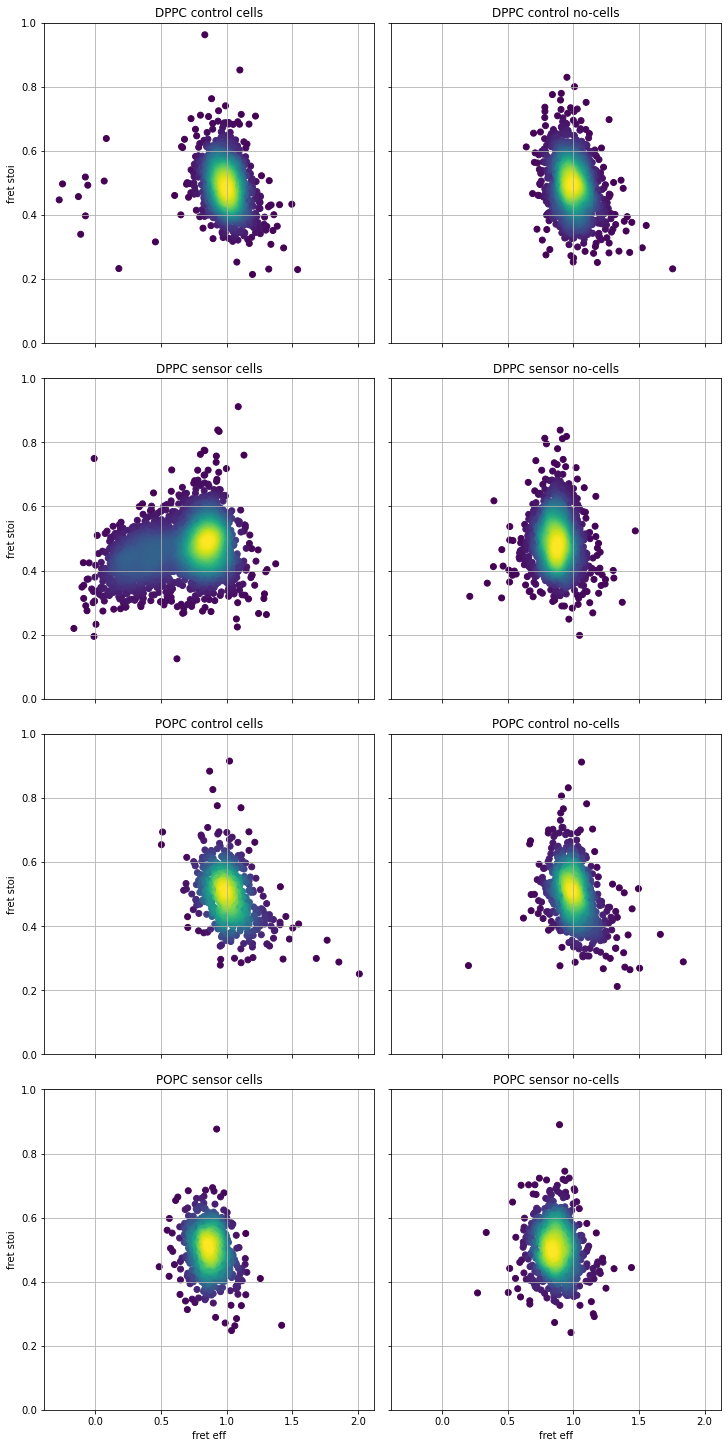

In [6]:
fig, ax = p.scatter(frame=None, ylim=(0, 1));
fig.savefig("scatter.pdf", bbox_inches="tight")

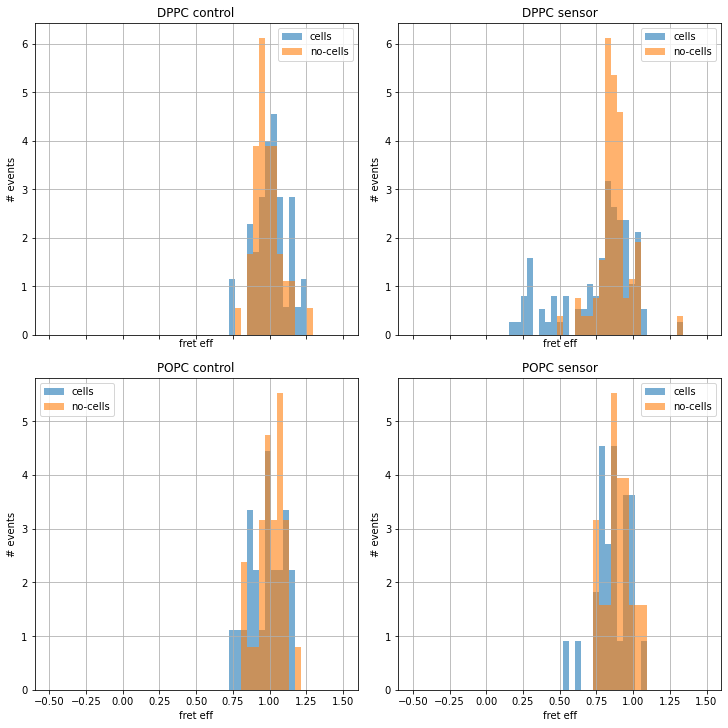

In [7]:
fig, ax = p.hist(frame=2, group_re=(r"(.+) (cells|no-cells)", 1, 2),
                 hist_args={"alpha": 0.6, "density": True});

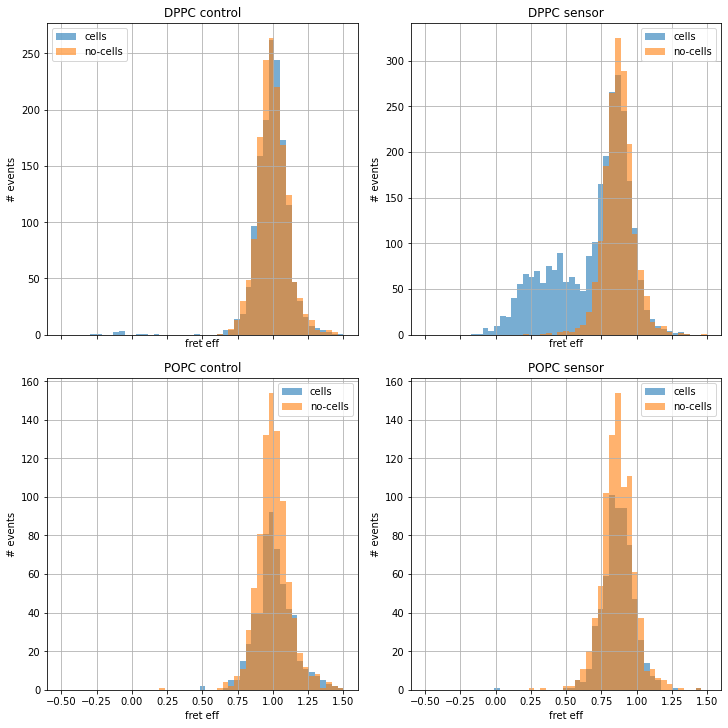

In [8]:
fig, ax = p.hist(group_re=(r"(.+) (cells|no-cells)", 1, 2),
                 hist_args={"alpha": 0.6, "density": False});
fig.savefig("hist.pdf", bbox_inches="tight")

In [11]:
trc = p.track_data["POPC sensor cells"]
trc_low = trc.groupby(("fret", "particle")).filter(lambda x: np.count_nonzero(x["fret", "eff"] < 0.6) >= 5)
low_fret_p = trc_low["fret", "particle"].unique()
low_fret_p

array([], dtype=int64)

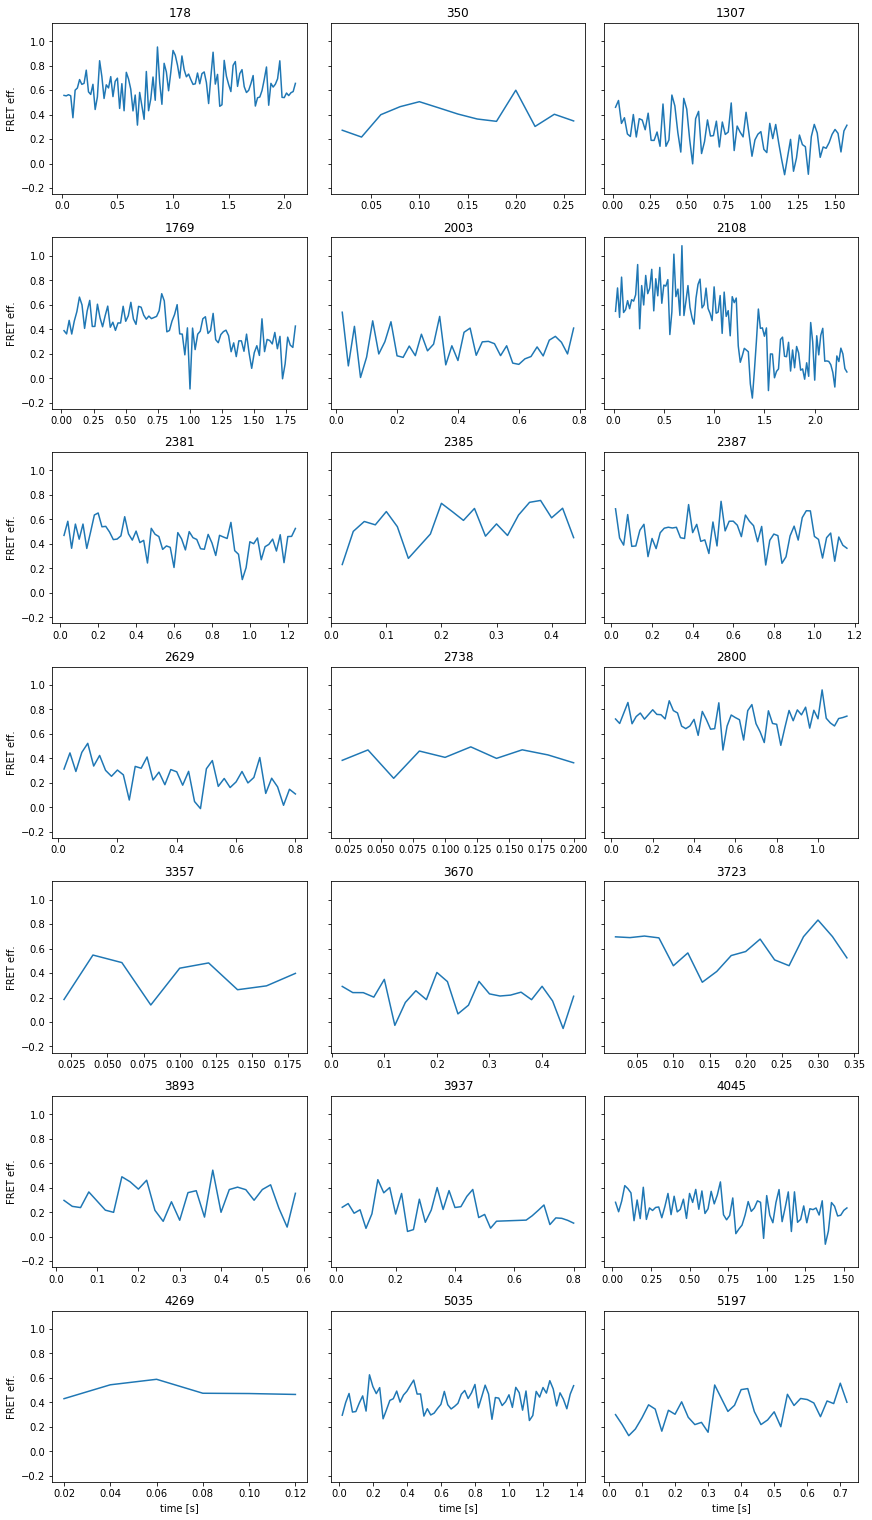

In [20]:
cols = 3
fps = 50
rows = math.ceil(len(low_fret_p) / cols)
fig, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharey=True,
                       constrained_layout=True)
for part, a in zip(low_fret_p, ax.flatten()):
    a.set_title(str(part))
    d = trc.loc[trc["fret", "particle"] == part,
                [("donor", "frame"), ("fret", "eff")]].values
    a.plot(d[:, 0] / 2 / fps, d[:, 1])
    a.set_ylim(-0.25, 1.15)
for a in ax[-1, :]:
    a.set_xlabel("time [s]")
for a in ax[:, 0]:
    a.set_ylabel("FRET eff.")
#fig.tight_layout()
#fig.savefig("time_vs_fret.pdf", bbox_inches="tight")

In [12]:
len(trc["fret", "particle"].unique())

29